In [1]:
%matplotlib inline
import pandas as pd

In [104]:
data=pd.read_csv('../housing.txt',header=None,names=['size','room','price'])

In [107]:
data.head()

,size,room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
data.describe()

,size,room,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [13]:
import matplotlib.pyplot as plt

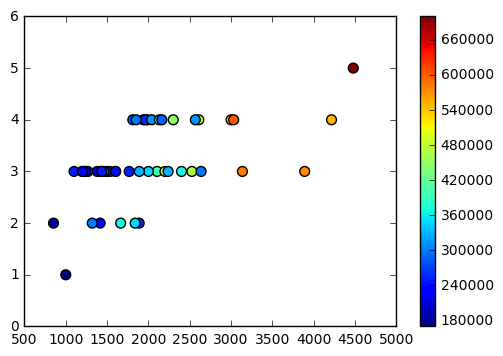

In [33]:
fig, ax = plt.subplots()
scat = ax.scatter(data['size'].reshape(data.shape[0],1),data.room, c=data.price, marker='o',s=50)
fig.colorbar(scat)

plt.show()

In [64]:
from sklearn import linear_model
import numpy as np

In [31]:
ligres=linear_model.LinearRegression()

In [105]:
model=ligres.fit(data[['size','room']],data['price'].values)

In [62]:
model.coef_

array([  139.21067402, -8738.01911233])

In [36]:
model.intercept_

89597.909542797541

In [38]:
model.predict([[2000,4]])

array([ 333067.18112874])

In [106]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(data[['size','room']]) - data['price']) ** 2))

Mean squared error: 4086560101.21


# Normalization

In [93]:
data=(data-data.mean())/data.std()

In [40]:
data.head()

,size,room,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


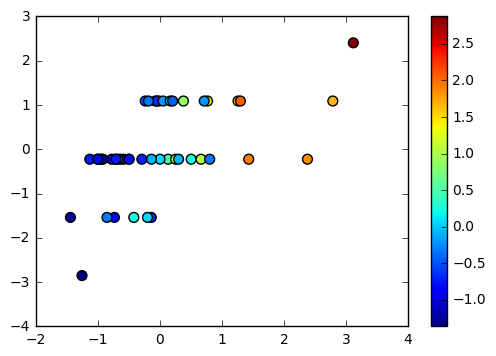

In [89]:
fig, ax = plt.subplots()
scat = ax.scatter(data['size'].reshape(data.shape[0],1),data.room, c=data.price, marker='o',s=50)
fig.colorbar(scat)

plt.show()

In [94]:
model=ligres.fit(data[['size','room']],data['price'].values)

In [42]:
model.coef_

array([ 0.88476599, -0.05317882])

In [98]:
model.intercept_

-9.2685232979875186e-17

In [91]:
mean,std=data.mean(),data.std()

In [92]:
size_test,room_test=(2000-mean['size'])/std['size'],(4-mean['room'])/std['room']

In [95]:
result=model.predict([[size_test,room_test]])[0]

In [97]:
result

-0.058745076331856924

In [96]:
std['price']*result+mean['price']

333067.18112873723

In [84]:
predict=model.predict(data[['size','room']])

In [85]:
predict=predict*std['price']+mean['price']

In [87]:
print("Mean squared error: %.2f"
      % np.mean((predict - data['price']) ** 2))

Mean squared error: 4086560101.21
